In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob



In [ ]:

# Path to your dataset directory
dataset_dir = '/content/drive/MyDrive/projecto de grad/archive'

# List all CSV files in the directory
csv_files = glob.glob(os.path.join(dataset_dir, '*.csv'))

# Print all CSV files found
if csv_files:
    print("Found the following CSV files:")
    for file in csv_files:
        print(file)
else:
    print("No CSV files found in the specified directory!")


Found the following CSV files:
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv
/content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv
/

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, LSTM, Reshape, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:


# Step 1: Load the Dataset
print("Available CSV files in your dataset directory:")
for i, file in enumerate(csv_files):
    print(f"{i + 1}. {file}")


dfs = []
for dataset_file in csv_files:
    print("\nLoading dataset from:", dataset_file)
    df_temp = pd.read_csv(dataset_file, delimiter='|', low_memory=False, na_values=['?', 'NA', 'null', '-'])
    dfs.append(df_temp)


Available CSV files in your dataset directory:
1. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
2. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv
3. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv
4. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv
5. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv
6. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv
7. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv
8. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv
9. /content/drive/MyDrive/projecto de grad/archive/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv
10. /content/drive/MyDrive/projecto de grad/archive/CTU

In [ ]:
df_temp=None
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
             ts                 uid        id.orig_h  id.orig_p  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   

         id.resp_h  id.resp_p proto service  duration  orig_bytes  ...  \
0   65.127.233.163       23.0   tcp     NaN  2.999051         0.0  ...   
1    63.150.16.171       23.0   tcp     NaN       NaN         NaN  ...   
2     111.40.23.49       23.0   tcp     NaN       NaN         NaN  ...   
3  131.174.215.147       23.0   tcp     NaN  2.998796         0.0  ...   
4      91.42.47.63       23.0   tcp     NaN       NaN         NaN  ...   

   local_resp missed_bytes  history  orig_pkts  orig_ip_bytes resp_pkts  \
0         NaN          0.0        S        3.0  

In [ ]:


# Basic dataset information
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         3241 non-null     object 
 8   duration        212448 non-null   float64
 9   orig_bytes      212448 non-null   float64
 10  resp_bytes      212448 non-null   float64
 11  conn_state      1008748 non-null  object 
 12  local_orig      0 non-null        float64
 13  local_resp      0 non-null        float64
 14  missed_bytes    1008748 non-null  float64
 15  history         991327 non-null   object 
 16  orig_pkts       10087

In [ ]:

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service           1005507
duration           796300
orig_bytes         796300
resp_bytes         796300
conn_state              0
local_orig        1008748
local_resp        1008748
missed_bytes            0
history             17421
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents    1008748
label                   0
detailed-label     469275
dtype: int64


In [ ]:

# Step 3: Clean Missing Values
# Drop columns with more than 50% missing values
missing_threshold = 0.2
total_rows = len(df)
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() / total_rows > missing_threshold]
print("\nDropping columns with more than 50% missing values:", columns_to_drop)
df = df.drop(columns=columns_to_drop)


Dropping columns with more than 50% missing values: ['service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'tunnel_parents', 'detailed-label']


In [ ]:
print(df.isnull().sum())

ts                   0
uid                  0
id.orig_h            0
id.orig_p            0
id.resp_h            0
id.resp_p            0
proto                0
conn_state           0
missed_bytes         0
history          17421
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
dtype: int64


In [ ]:
# Drop rows where 'history' has missing values
if 'history' in df.columns:
    print("\nDropping rows with missing 'history' values")
    df = df.dropna(subset=['history'])


Dropping rows with missing 'history' values


In [ ]:
# Count unique values for each column
unique_counts = df.nunique()

# Display columns with all unique or single unique values
print("Columns with all unique values:")
print(unique_counts[unique_counts == len(df)])  # Likely IDs or timestamps

print("\nColumns with a single unique value:")
print(unique_counts[unique_counts <= 1])  # Not useful

Columns with all unique values:
ts     991327
uid    991327
dtype: int64

Columns with a single unique value:
missed_bytes    1
dtype: int64


In [ ]:
#No need for IPs or UID because of biased
#tunnel parents local resp and local_origen doesnt have anything
irrelevant_cols = ['uid', 'ts', 'id.orig_h', 'id.resp_h']
df.drop(columns=irrelevant_cols, inplace=True)


In [ ]:
print(df.head())

   id.orig_p  id.resp_p proto conn_state  missed_bytes history  orig_pkts  \
0    51524.0       23.0   tcp         S0           0.0       S        3.0   
1    56305.0       23.0   tcp         S0           0.0       S        1.0   
2    41101.0       23.0   tcp         S0           0.0       S        1.0   
3    60905.0       23.0   tcp         S0           0.0       S        3.0   
4    44301.0       23.0   tcp         S0           0.0       S        1.0   

   orig_ip_bytes  resp_pkts  resp_ip_bytes      label  
0          180.0        0.0            0.0  Malicious  
1           60.0        0.0            0.0  Malicious  
2           60.0        0.0            0.0  Malicious  
3          180.0        0.0            0.0  Malicious  
4           60.0        0.0            0.0  Malicious  


In [ ]:
#this is a csv file with the data already precleaned to prevent ram overusage
dataset_file="/content/drive/MyDrive/combined_data.csv"
df = pd.read_csv(dataset_file)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:

# Load the dataset and take a random 50% sample for faster calculations and ram usage in collab
print("Loading and sampling the dataset...")
df_temp = pd.read_csv(dataset_file)
df = df_temp.sample(frac=0.5, random_state=42)  # 50% sample, random_state ensures reproducibility

print(f"Original dataset shape: {df_temp.shape}")
print(f"Sampled dataset shape: {df.shape}")


Loading and sampling the dataset...
Original dataset shape: (24975484, 11)
Sampled dataset shape: (12487742, 11)


In [ ]:
del df_temp

In [ ]:
df.head()

,id.orig_p,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1834657,54758.0,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Benign
7810837,60826.0,992.0,tcp,RSTOS0,0.0,I,2.0,80.0,0.0,0.0,Malicious DDoS
22790349,46168.0,23.0,tcp,S0,0.0,S,6.0,360.0,0.0,0.0,Malicious PartOfAHorizontalPortScan
1798054,35536.0,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Benign
20117947,3581.0,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,Malicious DDoS


In [ ]:
df.nunique()

,0
id.orig_p,65536
id.resp_p,63094
proto,2
conn_state,13
missed_bytes,15
history,203
orig_pkts,157
orig_ip_bytes,1433
resp_pkts,105
resp_ip_bytes,1411


In [ ]:

# Step 4: Encode Categorical Features
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    if column != 'label':  # Skip encoding the target column for now
        df[column] = label_encoder.fit_transform(df[column])

# Encode the target column 'label' into 0 (Benign) and 1 (Malicious)
if 'label' not in df.columns:
    raise ValueError("Target column 'label' not found in the dataset! Check column names.")

df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)


In [ ]:

# Count benign and malicious samples
label_counts = df['label'].value_counts()

# Print the counts
print("Counts of Benign and Malicious samples:")
print(f"Benign (0): {label_counts.get(0, 0)}")
print(f"Malicious (1): {label_counts.get(1, 0)}")

Counts of Benign and Malicious samples:
Benign (0): 4377105
Malicious (1): 8110637


In [ ]:
# Count labels
label_counts = df['label'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Benign', 'Malicious'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title('Data Distribution: Benign vs Malicious')
plt.show()


In [ ]:

# Step 5: Feature-Target Split
target_column = 'label'
features = df.drop(columns=[target_column])
labels = df[target_column]

print("\nFeature and Target Shapes:")
print(f"Features: {features.shape}, Labels: {labels.shape}")



Feature and Target Shapes:
Features: (12487742, 10), Labels: (12487742,)


In [ ]:

# Step 6: Data Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:

# Step 7: Split into Train/Validation/Test
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nFinal Data Shapes:")
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Validation Features: {X_val.shape}, Validation Labels: {y_val.shape}")
print(f"Testing Features: {X_test.shape}, Testing Labels: {y_test.shape}")



Final Data Shapes:
Training Features: (8741419, 10), Training Labels: (8741419,)
Validation Features: (1873161, 10), Validation Labels: (1873161,)
Testing Features: (1873162, 10), Testing Labels: (1873162,)


In [ ]:
#for ram usage
del df

In [ ]:
# Step 8: Reshape Data for CNN, LSTM, and Transformer Input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Step 9: Build and Train ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("\nTraining the ANN model...")
history_ann = ann_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])



Training the ANN model...
Epoch 1/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 151s 2ms/step - accuracy: 0.7346 - loss: 0.4231 - val_accuracy: 0.8031 - val_loss: 0.3670
Epoch 2/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.7677 - loss: 0.3891 - val_accuracy: 0.7380 - val_loss: 0.4126
Epoch 3/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.7603 - loss: 0.8987 - val_accuracy: 0.7367 - val_loss: 0.4185
Epoch 4/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 200s 2ms/step - accuracy: 0.7372 - loss: 0.4450 - val_accuracy: 0.7348 - val_loss: 0.4174
Epoch 5/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.7522 - loss: 0.6317 - val_accuracy: 0.7381 - val_loss: 0.4169
Epoch 6/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.7375 - loss: 0.7407 - val_accuracy: 0.7380 - val_loss: 0.4166


In [ ]:
drive_path = '/content/drive/MyDrive/CICIoT2023'
# Save ANN model
ann_model.save(os.path.join(drive_path, 'ann_model.h5'))

In [ ]:
# Step 9: Evaluate the Model
print("\nEvaluating the ANN model...")
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"Test Loss: {ann_loss:.4f}, Test Accuracy: {ann_accuracy:.4f}")


Evaluating the ANN model...
58537/58537 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.8027 - loss: 0.3661
Test Loss: 0.3672, Test Accuracy: 0.8026


In [ ]:
"""
# Step 10: Plot Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""

"\n# Step 10: Plot Training History\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 6))\nplt.plot(history.history['accuracy'], label='Train Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.title('Model Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 6))\nplt.plot(history.history['loss'], label='Train Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Model Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

In [ ]:


# Step 12: Build and Train CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nTraining the CNN model...")
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=10, batch_size=128, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])




Training the CNN model...
Epoch 1/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 194s 3ms/step - accuracy: 0.7339 - loss: 0.4162 - val_accuracy: 0.7380 - val_loss: 0.4091
Epoch 2/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 186s 3ms/step - accuracy: 0.7373 - loss: 0.4105 - val_accuracy: 0.7377 - val_loss: 0.4099
Epoch 3/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 163s 2ms/step - accuracy: 0.7378 - loss: 0.4099 - val_accuracy: 0.7381 - val_loss: 0.4088
Epoch 4/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 184s 3ms/step - accuracy: 0.7379 - loss: 0.4103 - val_accuracy: 0.7385 - val_loss: 0.4083
Epoch 5/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 183s 3ms/step - accuracy: 0.7376 - loss: 0.4102 - val_accuracy: 0.7385 - val_loss: 0.4080
Epoch 6/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - accuracy: 0.7381 - loss: 0.4098 - val_accuracy: 0.7385 - val_loss: 0.4080
Epoch 7/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 163s 2ms/step - accuracy: 0.7383 - loss: 0.4091 - val_accuracy: 0.7341 - val_loss: 0.4207
Epoch 8/10
68293/68293 ━━━━━━━━━━━━

In [ ]:
drive_path = '/content/drive/MyDrive/CICIoT2023'
# Save CNN model
cnn_model.save(os.path.join(drive_path, 'cnn_model.h5'))

In [ ]:

# Step 13: Evaluate the CNN Model
print("\nEvaluating the CNN model...")
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {cnn_loss:.4f}, Test Accuracy: {cnn_accuracy:.4f}")


Evaluating the CNN model...
58537/58537 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.7812 - loss: 0.3967
Test Loss: 0.3973, Test Accuracy: 0.7810


In [ ]:
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""


"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 6))\nplt.plot(history_cnn.history['accuracy'], label='Train Accuracy')\nplt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')\nplt.title('CNN Model Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 6))\nplt.plot(history_cnn.history['loss'], label='Train Loss')\nplt.plot(history_cnn.history['val_loss'], label='Validation Loss')\nplt.title('CNN Model Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

In [ ]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

print("\nTraining the LSTM model...")
history_lstm = lstm_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=10, batch_size=128, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])



Training the LSTM model...
Epoch 1/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 502s 7ms/step - accuracy: 0.7347 - loss: 0.4119 - val_accuracy: 0.7376 - val_loss: 0.4095
Epoch 2/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 510s 7ms/step - accuracy: 0.7378 - loss: 0.4090 - val_accuracy: 0.7385 - val_loss: 0.4080
Epoch 3/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 513s 8ms/step - accuracy: 0.7383 - loss: 0.4084 - val_accuracy: 0.7387 - val_loss: 0.4077
Epoch 4/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 507s 7ms/step - accuracy: 0.7383 - loss: 0.4082 - val_accuracy: 0.7385 - val_loss: 0.4072
Epoch 5/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 507s 7ms/step - accuracy: 0.7385 - loss: 0.4079 - val_accuracy: 0.7383 - val_loss: 0.4084
Epoch 6/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 568s 8ms/step - accuracy: 0.7385 - loss: 0.4077 - val_accuracy: 0.7382 - val_loss: 0.4075
Epoch 7/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 509s 7ms/step - accuracy: 0.7385 - loss: 0.4076 - val_accuracy: 0.7388 - val_loss: 0.4073
Epoch 8/10
68293/68293 ━━━━━━━━━━━

In [ ]:
drive_path = '/content/drive/MyDrive/CICIoT2023'
# Save LSTM model
lstm_model.save(os.path.join(drive_path, 'lstm_model.h5'))

In [ ]:

# Step 16: Evaluate the LSTM Model
print("\nEvaluating the LSTM model...")
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {lstm_loss:.4f}, Test Accuracy: {lstm_accuracy:.4f}")


Evaluating the LSTM model...
58537/58537 ━━━━━━━━━━━━━━━━━━━━ 195s 3ms/step - accuracy: 0.7385 - loss: 0.4070
Test Loss: 0.4071, Test Accuracy: 0.7385


In [ ]:
"""
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nplt.plot(history_lstm.history['accuracy'], label='Train Accuracy')\nplt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')\nplt.title('LSTM Model Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 6))\nplt.plot(history_lstm.history['loss'], label='Train Loss')\nplt.plot(history_lstm.history['val_loss'], label='Validation Loss')\nplt.title('LSTM Model Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

In [ ]:

# Step 12: Build and Train Transformer Model
transformer_input = Input(shape=(X_train.shape[1], 1))
x = MultiHeadAttention(num_heads=4, key_dim=32)(transformer_input, transformer_input)
x = LayerNormalization(epsilon=1e-6)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
transformer_output = Dense(1, activation='sigmoid')(x)

transformer_model = tf.keras.Model(inputs=transformer_input, outputs=transformer_output)
transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print("\nTraining the Transformer model...")
history_transformer = transformer_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=10, batch_size=128, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])



Training the Transformer model...
Epoch 1/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 192s 3ms/step - accuracy: 0.6493 - loss: 0.6488 - val_accuracy: 0.6495 - val_loss: 0.6478
Epoch 2/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 179s 3ms/step - accuracy: 0.6492 - loss: 0.6480 - val_accuracy: 0.6495 - val_loss: 0.6478
Epoch 3/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 180s 3ms/step - accuracy: 0.6494 - loss: 0.6478 - val_accuracy: 0.6495 - val_loss: 0.6478
Epoch 4/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 235s 3ms/step - accuracy: 0.6498 - loss: 0.6476 - val_accuracy: 0.6495 - val_loss: 0.6478
Epoch 5/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 249s 3ms/step - accuracy: 0.6494 - loss: 0.6478 - val_accuracy: 0.6495 - val_loss: 0.6478
Epoch 6/10
68293/68293 ━━━━━━━━━━━━━━━━━━━━ 183s 3ms/step - accuracy: 0.6496 - loss: 0.6477 - val_accuracy: 0.6495 - val_loss: 0.6478


In [ ]:
drive_path = '/content/drive/MyDrive/CICIoT2023'

# Save Transformer model
transformer_model.save(os.path.join(drive_path, 'transformer_model.keras'))

In [ ]:
transformer_loss, transformer_accuracy = transformer_model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {transformer_loss:.4f}, Test Accuracy: {transformer_accuracy:.4f}")


58537/58537 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.6496 - loss: 0.6478
Test Loss: 0.6478, Test Accuracy: 0.6496


In [ ]:

# Step 13: Compare Model Performances
print("\nModel Performance Comparison:")
print(f"ANN Model:         Accuracy = {ann_accuracy:.4f}, Loss = {ann_loss:.4f}")
print(f"CNN Model:         Accuracy = {cnn_accuracy:.4f}, Loss = {cnn_loss:.4f}")
print(f"LSTM Model:        Accuracy = {lstm_accuracy:.4f}, Loss = {lstm_loss:.4f}")
print(f"Transformer Model: Accuracy = {transformer_accuracy:.4f}, Loss = {transformer_loss:.4f}")


Model Performance Comparison:
ANN Model:         Accuracy = 0.8026, Loss = 0.3672
CNN Model:         Accuracy = 0.7810, Loss = 0.3973
LSTM Model:        Accuracy = 0.7385, Loss = 0.4071
Transformer Model: Accuracy = 0.6496, Loss = 0.6478


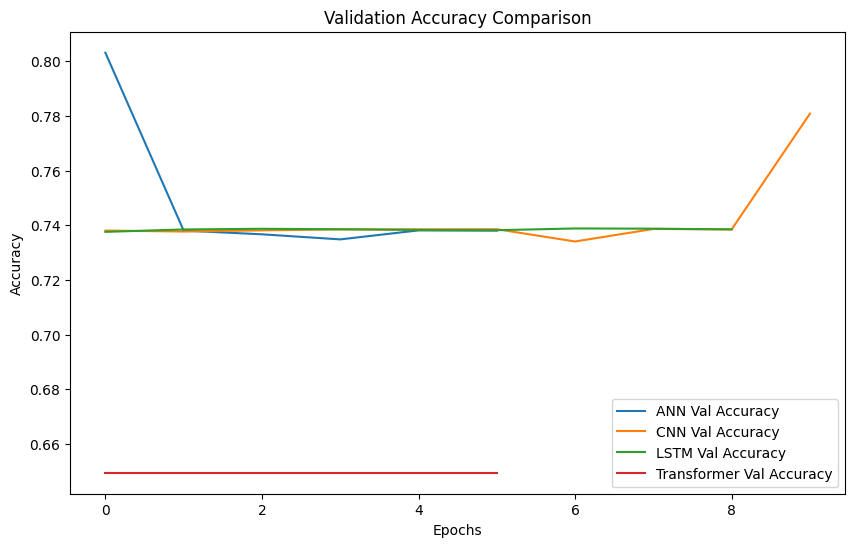

In [ ]:

# Step 14: Visualize Training History Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_ann.history['val_accuracy'], label='ANN Val Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# Model performance metrics
models = ['ANN', 'CNN', 'LSTM', 'Transformer']
accuracy = [ann_accuracy, cnn_accuracy, lstm_accuracy, transformer_accuracy]
loss = [ann_loss, cnn_loss, lstm_loss, transformer_loss]

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, loss, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.show()


58537/58537 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step


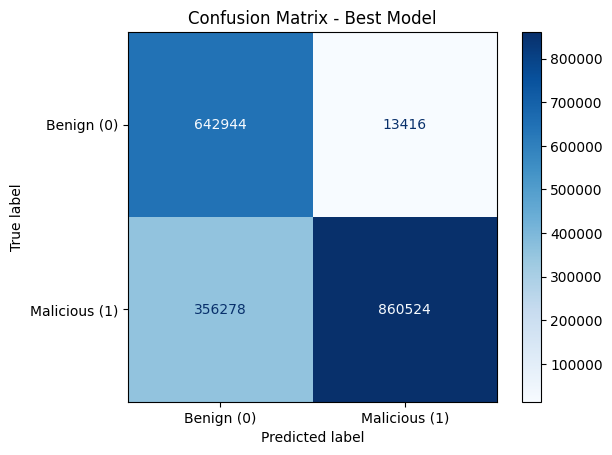

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

y_pred = (ann_model.predict(X_test_cnn) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with proper class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malicious (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.show()


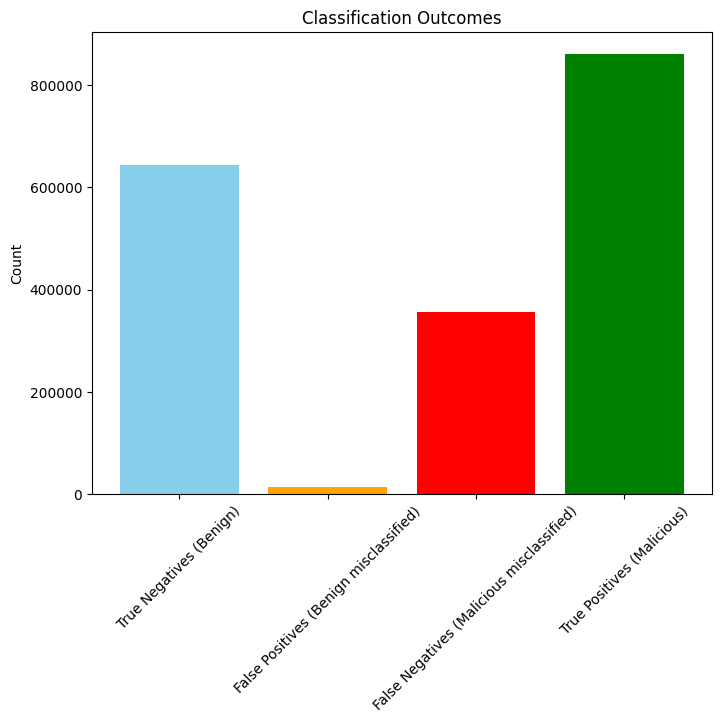

In [ ]:
# Extract FP, FN, TP, TN from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Plot the values
labels = ['True Negatives (Benign)', 'False Positives (Benign misclassified)',
          'False Negatives (Malicious misclassified)', 'True Positives (Malicious)']
values = [TN, FP, FN, TP]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'orange', 'red', 'green'])
plt.title('Classification Outcomes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:


# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malicious'])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

      Benign       0.64      0.98      0.78    656360
   Malicious       0.98      0.71      0.82   1216802

    accuracy                           0.80   1873162
   macro avg       0.81      0.84      0.80   1873162
weighted avg       0.87      0.80      0.81   1873162

